In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iquitos_dataset = pd.read_csv("../../dengueData/Iquitos/iquitos_training_data.csv")
print(iquitos_dataset.head())
print("Number of observations: ", len(iquitos_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  2000/2001            1      2000-07-01            0            0   
1  2000/2001            2      2000-07-08            0            0   
2  2000/2001            3      2000-07-15            0            0   
3  2000/2001            4      2000-07-22            0            0   
4  2000/2001            5      2000-07-29            0            0   

   denv3_cases  denv4_cases  other_positive_cases  total_cases  
0            0            0                     0            0  
1            0            0                     0            0  
2            0            0                     0            0  
3            0            0                     0            0  
4            0            0                     0            0  
Number of observations:  468


In [3]:
iquitos_cases = iquitos_dataset["total_cases"].values
print(iquitos_cases.shape)

(468,)


(137,)
[5 4 4 1 0 2 3 3 5 2]
[5 4 4 1 0 2 3 3 5 2]
[5 5 4 4 1 0 2 3 3 5]
(137,)
Test MSE: 62.292


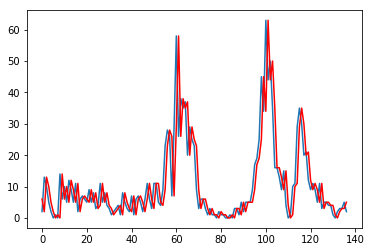

(136,)
[5 4 4 1 0 2 3 3 5 2]
[5 4 4 1 0 2 3 3 5 2]
[3 5 5 4 4 1 0 2 3 3]
(136,)
Test MSE: 88.272


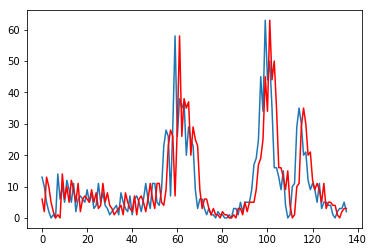

(135,)
[5 4 4 1 0 2 3 3 5 2]
[5 4 4 1 0 2 3 3 5 2]
[11  3  5  5  4  4  1  0  2  3]
(135,)
Test MSE: 121.859


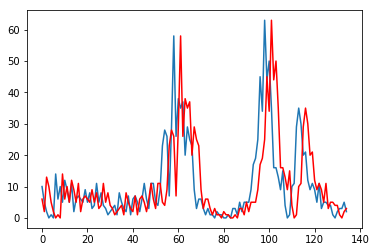

(134,)
[5 4 4 1 0 2 3 3 5 2]
[5 4 4 1 0 2 3 3 5 2]
[ 5 11  3  5  5  4  4  1  0  2]
(134,)
Test MSE: 155.896


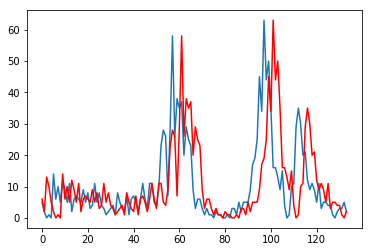

In [4]:
from sklearn.metrics import mean_squared_error

for lag_weeks in range(0, 4):
    window_size = 4
    split_index = int(len(iquitos_cases)* 0.7)

    test = iquitos_cases[split_index+lag_weeks+window_size:]
    predictions = iquitos_cases[split_index+window_size-1:-lag_weeks-1] # 1 week behind

    print(test.shape)

    print(iquitos_cases[-10:])
    print(test[-10:])
    print(predictions[-10:])
    print(predictions.shape)
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()